In [1]:
import tensorflow as tf

In [3]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [6]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]

In [7]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [10]:
@tf.function
def hypothesis(x):
    return w*x + b


In [12]:
x_test = [3.5, 5, 5.5, 6]
hypothesis(x_test).numpy()

array([15., 21., 23., 25.], dtype=float32)

In [13]:
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y - y_pred))

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]


In [15]:
optimizer = tf.optimizers.SGD(0.01)

In [17]:
for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(x)
        cost = mse_loss(y_pred, y)
    gradients = tape.gradient(cost, [w, b])

    optimizer.apply_gradients(zip(gradients, [w,b]))

    if i % 10 == 0:
        print(f'epoch: {i}, w: {w.numpy()}, b: {b.numpy()}, cost: {cost}')

epoch: 0, w: 8.213334083557129, b: 1.6644444465637207, cost: 1402.5555419921875
epoch: 10, w: 10.497106552124023, b: 1.9769314527511597, cost: 1.3511818647384644
epoch: 20, w: 10.504677772521973, b: 1.9297070503234863, cost: 1.3281631469726562
epoch: 30, w: 10.511880874633789, b: 1.884377121925354, cost: 1.3069663047790527
epoch: 40, w: 10.518795013427734, b: 1.8408751487731934, cost: 1.2874360084533691
epoch: 50, w: 10.525429725646973, b: 1.7991273403167725, cost: 1.2694587707519531
epoch: 60, w: 10.5317964553833, b: 1.7590630054473877, cost: 1.2528973817825317
epoch: 70, w: 10.537906646728516, b: 1.7206143140792847, cost: 1.2376437187194824
epoch: 80, w: 10.543770790100098, b: 1.6837157011032104, cost: 1.2235968112945557
epoch: 90, w: 10.549399375915527, b: 1.6483054161071777, cost: 1.2106581926345825
epoch: 100, w: 10.55479907989502, b: 1.6143227815628052, cost: 1.1987404823303223
epoch: 110, w: 10.559982299804688, b: 1.5817103385925293, cost: 1.1877667903900146
epoch: 120, w: 10.56

In [18]:
x_test = [3.5, 5, 5.5, 6]

In [19]:
print(hypothesis(x_test).numpy())


[38.35479  54.295143 59.608593 64.92204 ]


In [22]:
list(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=-0.023300648>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14644244>]

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [24]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]


In [25]:
model = Sequential()

In [26]:
model.add(Dense(1, input_dim=1, activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x, y, epochs=300)

Epoch 1/300


C:\Users\BAUM\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 3130.2891 - mse: 3130.2891
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 386.1869 - mse: 386.1869
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 48.5450 - mse: 48.5450
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 6.9999 - mse: 6.9999
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8873 - mse: 1.8873
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2574 - mse: 1.2574
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1791 - mse: 1.1791
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1687 - mse: 1.1687
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1667 - mse: 1.1667
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1657 - mse: 1.1657
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1648 -

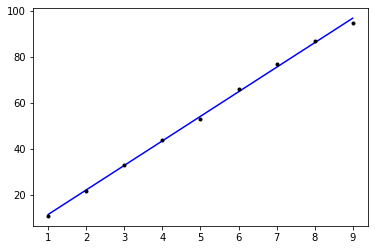

In [27]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [28]:
model.predict([9.5])

array([[102.18816]], dtype=float32)